In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Cargar datos

In [2]:
data = np.load(f'./CWRU_Original_data/signal_data.npy')
labels = np.load(f'./CWRU_Original_data/signal_data_labels.npy')

# Functions

In [3]:
def graficar_ejemplo(data):
   # Plot
    plt.figure(figsize=(20, 5))
    plt.plot(list(range(0,len(data))), data)
    plt.xlabel("nº de muestra")
    plt.ylabel("Amplitud")
    # plt.ylim((0,30))
    plt.grid()
    plt.show()

In [4]:
def graficar_todas(data):
     # Plot
    plt.figure(figsize=(20, 5))
    for fila in data:
      plt.plot(list(range(0,len(fila))), fila, 'b',alpha = 0.2)
    plt.xlabel("nº de muestra")
    plt.ylabel("Amplitud")
    # plt.ylim((0,30))
    plt.grid()
    plt.show()

# Normalize dataset between 0 and 1

In [5]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler(feature_range=(0, 1))

data_norm = []
for fila in data:
  # reshape para el min_max_escaler
  fila = fila.reshape(-1, 1)
  # aplicar min_max_scaler
  fila_min_max = min_max_scaler.fit_transform(fila)
  # aplanar vector
  fila_min_max = fila_min_max.flatten()
  # añadir al array
  data_norm.append(fila_min_max)

x_train_norm = np.array(data_norm)

# Original: Train 80% Test 20 %

In [6]:
from sklearn.model_selection import train_test_split

# Split dataset to get 20% for test data
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=20)


In [7]:
# Number of labels in training data
np.unique(y_train, return_counts=True)


(array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]),
 array([223, 218, 220, 228, 232, 224, 226, 229, 214, 226]))

In [8]:
# Number of lables in test data
np.unique(y_test, return_counts=True)


(array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]),
 array([57, 62, 60, 52, 48, 56, 54, 51, 66, 54]))

## Unbalance original data

### To unbalance the dataset, 200 samples are selected from label 0 and 20 samples from each of the other labels.

In [11]:
# Create dataframes
df_x_train = pd.DataFrame(x_train)
df_y_train = pd.DataFrame(y_train)

# Insert labels column in the dataframe
df_x_train.insert(0, 'labels', df_y_train)

# Change labels to int
df_x_train['labels'] = df_x_train['labels'].astype('int')

grouped = df_x_train.groupby('labels')

path_unbalanced_data = './CWRU_preprocess_data/unbalanced_dataset'

for label, group in grouped:
  if label == 0:

    # Create DataFrame with 200 rows of label #0
    df_group = group.iloc[:200,1:]
    np_data = df_group.to_numpy()
    np.save(f'{path_unbalanced_data}/unbalanced_npy_by_labels/x_train_label{label}_200samples.npy', np_data)

    # Crear array con las etiquetas
    np_labels = np.zeros(200)

  else:
    # For each label, take the first 20 time series
    df_group = group.iloc[:20,1:]
    np_group = df_group.to_numpy()
    np.save(f'{path_unbalanced_data}/unbalanced_npy_by_labels/x_train_label{label}_20samples.npy', np_group)

    # Concatenate dataframes
    np_data = np.concatenate((np_data, np_group), axis=0)

    np_nlabels = np.full(20, label)
    np_labels = np.concatenate((np_labels, np_nlabels), axis=None)

np.save(f'{path_unbalanced_data}/x_train_unbalanced.npy', np_data)
np.save(f'{path_unbalanced_data}/y_train_unbalanced.npy', np_labels)

## Normalized data

In [15]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler(feature_range=(0, 1))

x_train_norm = []
for fila in x_train:
  # reshape para el min_max_escaler
  fila = fila.reshape(-1, 1)
  # aplicar min_max_scaler
  fila_min_max = min_max_scaler.fit_transform(fila)
  # aplanar vector
  fila_min_max = fila_min_max.flatten()
  # añadir al array
  x_train_norm.append(fila_min_max)

x_train_norm = np.array(x_train_norm)

x_test_norm = []
for fila in x_test:
  # reshape para el min_max_escaler
  fila = fila.reshape(-1, 1)
  # aplicar min_max_scaler
  fila_min_max = min_max_scaler.fit_transform(fila)
  # aplanar vector
  fila_min_max = fila_min_max.flatten()
  # añadir al array
  x_test_norm.append(fila_min_max)

x_test_norm = np.array(x_test_norm)


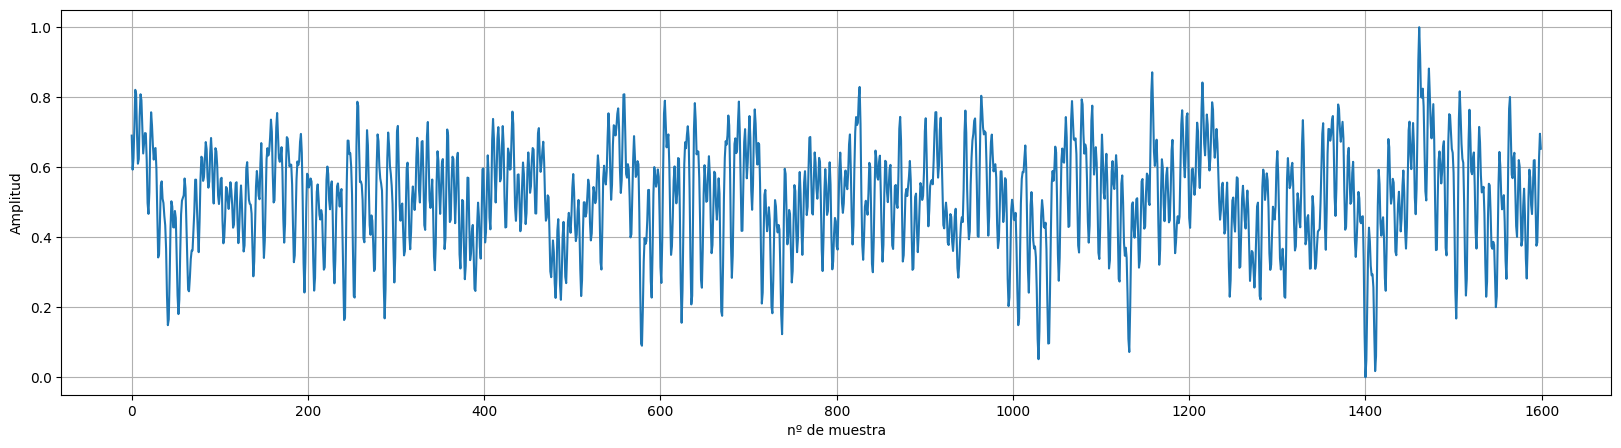

In [18]:
graficar_ejemplo(x_train_norm[60])

# 80% 20 % NORMALIZADO DESBALANCEADO

In [ ]:
# crear dataframes
df_x_train_norm = pd.DataFrame(x_train_norm)
df_y_train = pd.DataFrame(y_train)

# insertar columna labels en el dataframe
df_x_train_norm.insert(0, 'labels', df_y_train)

# Cambiar labels a int
df_x_train_norm['labels'] = df_x_train_norm['labels'].astype('int')

grouped = df_x_train_norm.groupby('labels')

for label, group in grouped:
  if label == 0:

    # Crear DataFrame con 200 filas de la etiqueta nº0
    df_group = group.iloc[:200,1:]
    np_data = df_group.to_numpy()
    np.save(f'/content/drive/MyDrive/TFM/Google_Colab/CWRU/CRWU_Javi/x_train_norm_desbalanceado/x_train_norm_label{label}_200filas.npy', np_data)

    # Crear array con las etiquetas
    np_labels = np.zeros(200)

  else:
    # Dataframe con los primeras 20 filas de cada label
    df_group = group.iloc[:20,1:]
    np_group = df_group.to_numpy()
    np.save(f'/content/drive/MyDrive/TFM/Google_Colab/CWRU/CRWU_Javi/x_train_norm_desbalanceado/x_train_norm_label{label}_20filas.npy', np_group)

    # Concatenar los dataframes
    np_data = np.concatenate((np_data, np_group), axis=0)

    np_nlabels = np.full(20, label)
    np_labels = np.concatenate((np_labels, np_nlabels), axis=None)

np.save(f'/content/drive/MyDrive/TFM/Google_Colab/CWRU/CRWU_Javi/x_train_norm_desbalanceado/x_train_norm_desbalanceado.npy', np_data)
np.save(f'/content/drive/MyDrive/TFM/Google_Colab/CWRU/CRWU_Javi/x_train_norm_desbalanceado/y_train_labels_norm_desbalanceado', np_labels)

In [ ]:
graficar_ejemplo(np_data[200])

# Fourier

In [ ]:
from scipy.fft import fft, fftfreq

frecuencia_muestreo = 48000

# Realizar la transformada de Fourier utilizando scipy
x_train_fourier = []
for fila in x_train:
  # fft_result es un número complejo
  fft_result = fft(fila)
  # listado de frecuencias desde 0 a 24000 y -24000 a 0-> array([  0.,  30.,  60., ..., -90., -60., -30.]) sirve para graficar
  frecuencias = np.array(fftfreq(len(fft_result), 1/frecuencia_muestreo))

  # Usar el valor absoluto del número complejo
  fft_result_abs = np.abs(fft_result)
  x_train_fourier.append(fft_result_abs)

x_train_fourier = np.array(x_train_fourier)


# Realizar la transformada de Fourier utilizando scipy
x_test_fourier = []
for fila in x_test:
  # fft_result es un número complejo
  fft_result = fft(fila)

  # listado de frecuencias desde 0 a 24000 y -24000 a 0-> array([  0.,  30.,  60., ..., -90., -60., -30.]) sirve para graficar
  frecuencias = np.array(fftfreq(len(fft_result), 1/frecuencia_muestreo))

  # Usar el valor absoluto del número complejo
  fft_result_abs = np.abs(fft_result)
  x_test_fourier.append(fft_result_abs)

x_test_fourier = np.array(x_test_fourier)


In [ ]:
# Reordenar gráfica

def reordenar(data):
  np_reordenado = []
  for fila in data:
    primera_mitad = fila[:800]
    segunda_mitad = fila[800:]
    fila_reordenada = np.concatenate((segunda_mitad, primera_mitad), axis=None)
    np_reordenado.append(fila_reordenada)

  return np_reordenado

In [ ]:
x_train_fourier_reordenado = reordenar(x_train_fourier)
x_test_fourier_reordenado = reordenar(x_test_fourier)

In [ ]:
graficar_ejemplo(x_train_fourier_reordenado[2])

In [ ]:
# x_train_fourier
np.save('/content/drive/MyDrive/TFM/Google_Colab/CWRU/CRWU_Javi/x_train_fourier/x_train_fourier.npy', x_train_fourier_reordenado)

# x_test_fourier
np.save('/content/drive/MyDrive/TFM/Google_Colab/CWRU/CRWU_Javi/x_train_fourier/x_test_fourier.npy', x_test_fourier_reordenado)

In [ ]:
print(x_train_fourier.shape)
print(x_test_fourier.shape)

In [ ]:
graficar_ejemplo(x_test_fourier_reordenado[488])

# Fourier desbalanceado 20 muestras

In [ ]:
# crear dataframes
df_x_train_fourier = pd.DataFrame(x_train_fourier_reordenado)
df_y_train = pd.DataFrame(y_train)

# insertar columna labels en el dataframe
df_x_train_fourier.insert(0, 'labels', df_y_train)

# Cambiar labels a int
df_x_train_fourier['labels'] = df_x_train_fourier['labels'].astype('int')

grouped = df_x_train_fourier.groupby('labels')

for label, group in grouped:
  if label == 0:

    # Crear DataFrame con 200 filas de la etiqueta nº0
    df_group = group.iloc[:200,1:]
    np_data = df_group.to_numpy()
    np.save(f'/content/drive/MyDrive/TFM/Google_Colab/CWRU/CRWU_Javi/x_train_fourier_desbalanceado/x_train_fourier_label{label}_200filas.npy', np_data)

    # Crear array con las etiquetas
    np_labels = np.zeros(200)

  else:
    # Dataframe con los primeras 20 filas de cada label
    df_group = group.iloc[:20,1:]
    np_group = df_group.to_numpy()
    np.save(f'/content/drive/MyDrive/TFM/Google_Colab/CWRU/CRWU_Javi/x_train_fourier_desbalanceado/x_train_fourier_label{label}_20filas.npy', np_group)

    # Concatenar los dataframes
    np_data = np.concatenate((np_data, np_group), axis=0)

    np_nlabels = np.full(20, label)
    np_labels = np.concatenate((np_labels, np_nlabels), axis=None)

np.save(f'/content/drive/MyDrive/TFM/Google_Colab/CWRU/CRWU_Javi/x_train_fourier_desbalanceado/x_train_fourier_desbalanceado.npy', np_data)
np.save(f'/content/drive/MyDrive/TFM/Google_Colab/CWRU/CRWU_Javi/x_train_fourier_desbalanceado/y_train_labels_fourier_desbalanceado', np_labels)

In [ ]:
np_data.shape

In [ ]:
np_labels.shape

# Normalizar Fourier

In [ ]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler(feature_range=(0, 1))

x_train_fourier_norm = []
for fila in x_train_fourier_reordenado:
  # reshape para el min_max_escaler
  fila = fila.reshape(-1, 1)
  # aplicar min_max_scaler
  fila_min_max = min_max_scaler.fit_transform(fila)
  # aplanar vector
  fila_min_max = fila_min_max.flatten()
  # añadir al array
  x_train_fourier_norm.append(fila_min_max)

x_train_fourier_norm = np.array(x_train_fourier_norm)


x_test_fourier_norm = []
for fila in x_test_fourier_reordenado:
  # reshape para el min_max_escaler
  fila = fila.reshape(-1, 1)
  # aplicar min_max_scaler
  fila_min_max = min_max_scaler.fit_transform(fila)
  # aplanar vector
  fila_min_max = fila_min_max.flatten()
  # añadir al array
  x_test_fourier_norm.append(fila_min_max)

x_test_fourier_norm = np.array(x_test_fourier_norm)

# x_train_norm
np.save('/content/drive/MyDrive/TFM/Google_Colab/CWRU/CRWU_Javi/x_train_fourier_norm/x_train_fourier_norm.npy', x_train_fourier_norm)

# y_test_norm
np.save('/content/drive/MyDrive/TFM/Google_Colab/CWRU/CRWU_Javi/x_train_fourier_norm/x_test_fourier_norm.npy', x_test_fourier_norm)


In [ ]:
print(x_train_fourier_norm.shape)
print(x_test_fourier_norm.shape)

In [ ]:
graficar_ejemplo(x_train_fourier_norm[488])

# Normalizado Fourier Desbalanceado

In [ ]:
# crear dataframes
df_x_train_fourier_norm = pd.DataFrame(x_train_fourier_norm)
df_y_train = pd.DataFrame(y_train)

# insertar columna labels en el dataframe
df_x_train_fourier_norm.insert(0, 'labels', df_y_train)

# Cambiar labels a int
df_x_train_fourier_norm['labels'] = df_x_train_fourier_norm['labels'].astype('int')

grouped = df_x_train_fourier_norm.groupby('labels')

for label, group in grouped:
  if label == 0:

    # Crear DataFrame con 200 filas de la etiqueta nº0
    df_group = group.iloc[:200,1:]
    np_data = df_group.to_numpy()
    np.save(f'/content/drive/MyDrive/TFM/Google_Colab/CWRU/CRWU_Javi/x_train_fourier_norm_desbalanceado/x_train_fourier_norm_label{label}_200filas.npy', np_data)

    # Crear array con las etiquetas
    np_labels = np.zeros(200)

  else:
    # Dataframe con los primeras 20 filas de cada label
    df_group = group.iloc[:20,1:]
    np_group = df_group.to_numpy()
    np.save(f'/content/drive/MyDrive/TFM/Google_Colab/CWRU/CRWU_Javi/x_train_fourier_norm_desbalanceado/x_train_fourier_norm_label{label}_20filas.npy', np_group)

    # Concatenar los dataframes
    np_data = np.concatenate((np_data, np_group), axis=0)

    np_nlabels = np.full(20, label)
    np_labels = np.concatenate((np_labels, np_nlabels), axis=None)

np.save(f'/content/drive/MyDrive/TFM/Google_Colab/CWRU/CRWU_Javi/x_train_fourier_norm_desbalanceado/x_train_fourier_norm_desbalanceado.npy', np_data)
np.save(f'/content/drive/MyDrive/TFM/Google_Colab/CWRU/CRWU_Javi/x_train_fourier_norm_desbalanceado/y_train_labels_fourier_norm_desbalanceado', np_labels)

In [ ]:
np_data.shape

In [ ]:
np_labels.shape

In [ ]:
graficar_ejemplo(np_data[134])